# pandas

This workshop's goal&mdash;which is facilitated by this Jupyter notebook&mdash;is to give attendees the confidence to use `pandas` in their research projects. Basic familiarity with Python *is* assumed.

`pandas` is designed to make it easier to work with structured data. Most of the analyses you might perform will likely involve using tabular data, e.g., from .csv files or relational databases (e.g., SQL). The `DataFrame` object in `pandas` is "a two-dimensional tabular, column-oriented data structure with both row and column labels."

If you're curious:

>The `pandas` name itself is derived from *panel data*, an econometrics term for multidimensional structured data sets, and *Python data analysis* itself.

To motivate this workshop, we'll work with example data and go through the various steps you might need to prepare data for analysis. You'll (hopefully) realize that doing this type of work is much more difficult using Python's built-in data structures.

The data used in these examples is available in the following [GitHub repository](https://github.com/juanshishido/introduction-to-pandas). If you've [cloned that repo](https://www.atlassian.com/git/tutorials/setting-up-a-repository/git-clone), which is the recommended approach, you'll have everything you need to run this notebook. Otherwise, you can download the data file(s) from the above link. (Note: this notebook assumes that the data files are in a directory named `data/` found within your current working directory.)

For this example, we're working with European unemployment data from Eurostat, which is hosted by [Google](https://code.google.com/p/dspl/downloads/list). There are several .csv files that we'll work with in this workshop.

Let's begin by importing `pandas` using the conventional abbreviation.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('savefig', dpi=200)
plt.style.use('ggplot')
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

The `read_csv()` function in `pandas` allows us to easily import our data. By default, it assumes the data is comma-delimited. However, you can specify the delimiter used in your data (e.g., tab, semicolon, pipe, etc.). There are several parameters that you can specify. See the documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). `read_csv()` returns a `DataFrame`.

Notice that we call `read_csv()` using the `pd` abbreviation from the import statement above.

In [2]:
unemployment = pd.read_csv('data/country_total.csv')

Great! You've created a `pandas` `DataFrame`. We can look at our data by using the `.head()` method. By default, this shows the header (column names) and the first five rows. Passing an integer, $n$, to `.head()` returns that number of rows. To see the last $n$ rows, use `.tail()`.

In [3]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


To find the number of rows, you can use the `len()` function. Alternatively, you can use the `shape` attribute.

In [4]:
unemployment.shape

(20796, 5)

There are 20,796 rows and 5 columns.

You may have noticed that the `month` column also includes the year. Let's go ahead and rename it.

In [5]:
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)

The `.rename()` method allows you to modify index labels and/or column names. As you can see, we passed a `dict` to the `columns` parameter, with the original name as the key and the new name as the value. Importantly, we also set the `inplace` parameter to `True`, which modifies the *actual* `DataFrame`, not a copy of it.

It might also make sense to separate the data in `year_month` into two separate columns. To do this, you'll need to know how to select a single column. We can either use bracket (`[]`) or dot notation (referred to as *attribute access*).

In [6]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

In [7]:
unemployment.year_month.head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

It is preferrable to use the bracket notation as a column name might inadvertently have the same name as a `DataFrame` (or `Series`) method. In addition, only bracket notation can be used to create a new column. If you try and use attribute access to create a new column, you'll create a new attribute, *not* a new column.

When selecting a single column, we have a `pandas` `Series` object, which is a single vector of data (e.g., a NumPy array) with "an associated array of data labels, called its *index*." A `DataFrame` also has an index. In our example, the indices are an array of sequential integers, which is the default. You can find them in the left-most position, without a column label.

Indices need not be a sequence of integers. They can, for example, be dates or strings. Note that indices do *not* need to be unique.

Indices, like column names, can be used to select data. Indices can be used to select particular rows. In fact, you can do something like `.head()` with slicing using the `[]` operator.

In [8]:
unemployment[:5]

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


---

### More on Indexing

Before we continue, let's look at a few useful ways to index data&mdash;that is, select rows.

`.loc` primarily works with string labels. It accepts a single label, a list (or array) of labels, or a slice of labels (e.g., `'a' : 'f'`).

Let's create a `DataFrame` to see how this works. (This is based on an [example](https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/1.%20Data%20Preparation.ipynb) from Chris Fonnesbeck's [Computational Statistics II Tutorial](https://github.com/fonnesbeck/scipy2015_tutorial).)

In [9]:
bacteria = pd.DataFrame({'bacteria_counts' : [632, 1638, 569, 115],
                         'other_feature' : [438, 833, 234, 298]},
                         index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

Notice that we pass in a `dict`, where the keys correspond to column names and the values to the data. In this example, we've also set the indices&mdash;strings in this case&mdash;to be the taxon of each bacterium.

In [10]:
bacteria

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


Now, if we're interested in the values (row) associated with "Actinobacteria," we can use `.loc` and the index name.

In [11]:
bacteria.loc['Actinobacteria']

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64

This returns the column values for the specified row. Interestingly, we could have also used "positional indexing," even though the indices are strings.

In [12]:
bacteria[2:3]

,bacteria_counts,other_feature
Actinobacteria,569,234


The difference is that the former returns a `Series`, while the latter returns a `DataFrame`.

Let's return to our unemployment data. Another indexing option, `.iloc`, primarily works with integer positions. To select specific rows, we can do the following.

In [13]:
unemployment.iloc[[1, 5, 6, 9]]

,country,seasonality,year_month,unemployment,unemployment_rate
1,at,nsa,1993.02,175000,4.6
5,at,nsa,1993.06,134000,3.5
6,at,nsa,1993.07,128000,3.4
9,at,nsa,1993.10,141000,3.7


We can select a range of rows and specify the step value.

In [14]:
unemployment.iloc[25:50:5]

,country,seasonality,year_month,unemployment,unemployment_rate
25,at,nsa,1995.02,174000,4.5
30,at,nsa,1995.07,123000,3.3
35,at,nsa,1995.12,175000,4.7
40,at,nsa,1996.05,159000,4.3
45,at,nsa,1996.10,146000,3.9


(Note: As is typical in Python, the end position is not included. Therefore, we don't see the row associated with the index 50.)

Indexing is important. You'll use it a lot. Below, we'll show how to index based on data values.

---

So, we still want to split `year_month` into two separate columns. Above, we saw that this column is type (technically, `dtype`) `float64`. We'll first extract the year using the `.astype()` method. This allows for type casting&mdash;basically converting from one type to another. We'll then subtract this value from `year_month`&mdash;to get the decimal portion of the value&mdash;and multiply the result by 100 and convert to `int`.

For more information on `pandas` `dtype`s, check the documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes).

In [15]:
unemployment['year'] = unemployment['year_month'].astype(int)

In this case, we're casting the floating point values to integers. In Python, this [truncates the decimals](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

If you didn't know this, you could have used NumPy's `floor()` function, as follows.

```
import numpy as np

unemployment['year'] = (np.floor(unemployment['year_month'])).astype(int)
```

Additionally, if you wanted to check whether the two approaches shown above result in the same set of values, you could something like the following.

```
(unemployment['year_month'].astype(int) == (np.floor(unemployment['year_month'])).astype(int)).all()
```

What this does is an element-wise comparison of the values in the corresponding arrays. The `.all()` method checks whether *all* elements are `True`.

Finally, let's create our month variable as described above. (Because of the truncating that occurs when casting to `int`, we first round the values to the nearest whole number.)

In [16]:
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)

In [17]:
unemployment.head(12)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1
1,at,nsa,1993.02,175000,4.6,1993,2
2,at,nsa,1993.03,166000,4.4,1993,3
3,at,nsa,1993.04,157000,4.1,1993,4
4,at,nsa,1993.05,147000,3.9,1993,5
5,at,nsa,1993.06,134000,3.5,1993,6
6,at,nsa,1993.07,128000,3.4,1993,7
7,at,nsa,1993.08,130000,3.4,1993,8
8,at,nsa,1993.09,132000,3.5,1993,9
9,at,nsa,1993.10,141000,3.7,1993,10


In [18]:
unemployment['month'][0]

1

To create the `month` column, we subtracted two vectors. This resulted in the decimal value in `year_month`. To transform the values to integers, we multiplied by 100.

Now, let's say we wanted to reorder the columns in the `DataFrame`. For this, we use bracket notation again, passing in a list of column names in the order we'd like to see them.

In [19]:
unemployment = unemployment[['country', 'seasonality',
                             'year_month', 'year', 'month',
                             'unemployment', 'unemployment_rate']]

In [20]:
unemployment.head(10)

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9
5,at,nsa,1993.06,1993,6,134000,3.5
6,at,nsa,1993.07,1993,7,128000,3.4
7,at,nsa,1993.08,1993,8,130000,3.4
8,at,nsa,1993.09,1993,9,132000,3.5
9,at,nsa,1993.10,1993,10,141000,3.7


So far, our `DataFrame` is organized in a reasonable way. But, we know we can do better. We're eventually going to be interested in the unemployment rate for each country. The trouble is, we don't exactly know what the values in `country` refer to. We can fix that by getting country names. These can be found in `countries.csv`. However, instead of loading the file in `data/`, why not try something else?

In [21]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = pd.read_csv(countries_url)

`read_csv()` can take a URL for the file path.

In [22]:
countries.tail(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
27,se,SE,eu,Sweden,Suède,Schweden,62.198468,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


This file has lots of useful information. It even has the country names is three different languages.

Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data. `country` looks like a good option. However, we don't need all of the columns in the `countries` `DataFrame`. To select certain columns, we use the name bracket notation we used to reorder the columns.

In [23]:
country_names = countries[['country', 'country_group', 'name_en']]

In [24]:
country_names.head(2)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium


`pandas` includes an easy-to-use merge function.

In [25]:
unemployment = pd.merge(unemployment, country_names, on='country')

Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

You might even need to merge on columns with different names. To do so, use the `left_on` and `right_on` parameters, where the first listed `DataFrame` is the "left" one and the second is the "right." It might look something this.

```
pd.merge(one, two, left_on='city', right_on='city_name')
```

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

`pandas` also provides a `.merge()` method that can act on a `DataFrame`. You can read more about that [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

In [26]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria


That's better. We now know that the abbreviation "at" corresponds to Austria. We might be curious to check what countries we have data for. The `Series` object includes a `.unique()` method. We'll use this to check the countries. We can select the name either using bracket or dot notation. (While we suggested using brackets above, it *is* sometimes easier to use dot notation. Just be careful.)

In [27]:
unemployment.name_en.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

To get a count of the number of unique countries, wrap the above code with `len()`.

In [28]:
len(unemployment.name_en.unique())

30

It might be more interesting to know how many observations we actually have. `pandas` has a `Series` method called `.value_counts()` that returns the counts for the unique values in the `Series`.

In [29]:
unemployment['name_en'].value_counts()

Portugal                                     1008
Belgium                                      1008
Netherlands                                  1008
Sweden                                       1008
Spain                                        1008
Denmark                                      1008
France                                       1008
Luxembourg                                   1008
Ireland                                      1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Poland                                        576
Malta                                         576
Hungary                                       576
Slovakia                                      576
Bulgaria                                      576
Slovenia                                      576


By default, the `Series` is sorted by values. If you'd like it sorted by index%mdash;country name in this case&mdash;append the `.sort_index()` method.

In [30]:
unemployment['name_en'].value_counts().sort_index()

Austria                                       648
Belgium                                      1008
Bulgaria                                      576
Croatia                                       324
Cyprus                                        396
Czech Republic                                468
Denmark                                      1008
Estonia                                       387
Finland                                       828
France                                       1008
Germany (including  former GDR from 1991)     504
Greece                                        450
Hungary                                       576
Ireland                                      1008
Italy                                         924
Latvia                                        459
Lithuania                                     459
Luxembourg                                   1008
Malta                                         576
Netherlands                                  1008


This will be useful for our analysis. The maximum number of observations for a given country for this time period is 1,008 observations. We'll note that certain countries, such as Turkey, have far less data.

How about finding the date range for this data set? Let's look at the minimum and maximum years.

In [31]:
unemployment['year'].min(), unemployment['year'].max()

(1983, 2010)

Next, we should pause for a moment and think about what data we really care about. For our purposes, the variable of interest is `unemployment_rate`. The number of observations by country only reflect the number of instances for each country name. It is possible, maybe even expected, to have some missing data. Let's find out how many unemployment rate values are missing.

In [32]:
unemployment['unemployment_rate'].isnull().sum()

945

The `.isnull()` method returns a corresponding boolean value for each entry in the unemployment rate `Series`. In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add the result (with `.sum()`), we get a count for the *total* number of missing values.

What if we'd like to know how many missing values exist at the *country* level? We can take the main part of what we had above and create a new column in the `DataFrame`.

In [33]:
unemployment['unemployment_rate_null'] = unemployment['unemployment_rate'].isnull()

To count the number of missing values for each country, we introduce the `.groupby()` method.

In [34]:
unemployment.groupby('name_en')['unemployment_rate_null'].sum()

name_en
Austria                                        0.0
Belgium                                        0.0
Bulgaria                                     180.0
Croatia                                      216.0
Cyprus                                         0.0
Czech Republic                                 0.0
Denmark                                        0.0
Estonia                                        0.0
Finland                                        0.0
France                                         0.0
Germany (including  former GDR from 1991)      0.0
Greece                                         0.0
Hungary                                       36.0
Ireland                                        0.0
Italy                                          0.0
Latvia                                         0.0
Lithuania                                      0.0
Luxembourg                                     0.0
Malta                                        180.0
Netherlands            

Let's explain what just happened. We start with our `DataFrame`. We tell `pandas` that we want to group the data by country name&mdash;that's what goes in the parentheses. Next, we need to tell it what column we'd like to perform the `.sum()` operation on. In this case, it's the indicator for whether or not the unemployment rate was missing.

As we saw above, the number of records for each country differs. We might, then, want to have the missing values by country shown as percentages. Let's create a new `DataFrame` for this.

We'll take the code from above and set the `as_index` parameter to `False`.

In [35]:
unemployment_rate = unemployment.groupby('name_en', as_index=False)['unemployment_rate_null'].sum()

`unemployment_rate` is a `DataFrame` with the information from cell 34, above. It's important to note that using `as_index=False` in `.groupby()` only works if the grouping column(s) are not the same as the columns on which we're performing the operation.

Also, to group by several columns, simply pass in a list of column names to `.groupby()`.

```
unemployment.groupby(['name_en', 'seasonality'])['unemployment_rate'].mean()
```

Now, let's add the number of observations by country to the `DataFrame`.

In [36]:
unemployment_rate['n_obs'] = unemployment.groupby('name_en')['name_en'].count().values

Here, we need to use the `values` attribute to get an array of the counts. Excluding `values` will result in a column full of `NaN`s. This is because the index in `unemployment.groupby('name_en')['name_en'].count()` is a list of the country names. When creating a new column, `pandas` tries to match on index. Recall that the default index values for a `DataFrame` is a sequence of integers.

Because we know (or have noticed) that the `.groupby()` function returns the values in alphabetical order, we can simply set the new column to the list of values, as we have done. You can, however, be more explicit and create another `DataFrame` and merge on country name.

Finally, let's create the column for the percentage of missing values.

In [37]:
unemployment_rate['null_percentage'] = unemployment_rate['unemployment_rate_null'] / unemployment_rate['n_obs']

In [38]:
unemployment_rate

,name_en,unemployment_rate_null,n_obs,null_percentage
0,Austria,0.0,648,0.000000
1,Belgium,0.0,1008,0.000000
2,Bulgaria,180.0,576,0.312500
3,Croatia,216.0,324,0.666667
4,Cyprus,0.0,396,0.000000
5,Czech Republic,0.0,468,0.000000
6,Denmark,0.0,1008,0.000000
7,Estonia,0.0,387,0.000000
8,Finland,0.0,828,0.000000
9,France,0.0,1008,0.000000


This is the first time we've called a `DataFrame` without something like `.head()`. By default, `pandas` prints 60 rows. In this case, because there are only 30 countries, we see the entire `DataFrame`.

As we can see, Croatia has lots of missing data. This `DataFrame` contains useful information&mdash;things to consider&mdash;when analyzing the data.

Suppose we wanted to save this as a .csv file. For this, we'd use the `.to_csv()` method.

In [39]:
unemployment_rate.to_csv('data/unemployment_missing.csv')

By default, this method writes the indices. We probably don't want that. Let's edit the code. Let's also be explicit about the type of delimiter we're interested in. (Values can be separated by pipes (`|`), semicolons (`;`), tabs (`\t`), etc.)

In [40]:
unemployment_rate.to_csv('data/unemployment_missing.csv', index=False, sep=',')

Much better!

Let's return to our main `DataFrame`. Now that we have the missing values information in `unemployment_rate`, we can drop the last column we added to `unemployment`.

In [41]:
unemployment.drop('unemployment_rate_null', axis=1, inplace=True)

It's important to specify the `axis` parameter. `axis=1` refers to columns. (`axis=0` refers to rows.) `inplace=True` simply modifies the actual `DataFrame`.

In [42]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,eu,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,eu,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,eu,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,eu,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,eu,Austria


Now that we know about the missing values, we have to deal with them. There are two main options:

* fill the missing values with some other values
* do not use observations with missing values
    * depending on the analysis, we may want to exclude entire countries
    
Because countries with missing unemployment rate data have at least 36 missing values, which is too many to fill, we'll take the second approach and exclude missing values from our primary analyses.

Instead of just getting rid of that data, it might make sense to store it in a separate `DataFrame`. This way, we could answer questions such as, "do missing values occur during certain months (or years) more frequently?" With this, we will introduce the concept of *boolean indexing* for filtering data.

In [43]:
unemployment_rate_missing = unemployment[unemployment['unemployment_rate'].isnull()]

Recall that `unemployment['unemployment_rate'].isnull()` produces an array of boolean values. We used this previously when counting the number of missing values, though we did not see its output. Let's see some of that now.

In [44]:
unemployment['unemployment_rate'].isnull()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: unemployment_rate, dtype: bool

To create `unemployment_rate_missing`, we're indexing `unemployment` with the array above. This returns only the rows where the value in the array is `True`. Let's see if it worked.

In [45]:
unemployment_rate_missing.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
1656,bg,nsa,1995.01,1995,1,391000,NaN,eu,Bulgaria
1657,bg,nsa,1995.02,1995,2,387000,NaN,eu,Bulgaria
1658,bg,nsa,1995.03,1995,3,378000,NaN,eu,Bulgaria
1659,bg,nsa,1995.04,1995,4,365000,NaN,eu,Bulgaria
1660,bg,nsa,1995.05,1995,5,346000,NaN,eu,Bulgaria


It is also possible to specify multiple conditions using the `&` operator, but each condition needs to be inside of parentheses. The `.isin()` method, which takes a `list` of values, is useful when you're interested in conditioning on multiple values on a given column. For example, if you want to select multiple countries.

Now, we're ready to remove the missing data in `unemployment`. To do this, we can use the `.dropna()` method.

In [46]:
unemployment.dropna(subset=['unemployment_rate'], inplace=True)

At this point, you might be curious to know what the highest unemployment rates were. For this, we'll use the `.sort()` method.

In [47]:
unemployment.sort_values(by='unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
15526,pl,nsa,2004.02,2004,2,3531000,20.9,eu,Poland
15525,pl,nsa,2004.01,2004,1,3520000,20.7,eu,Poland
15514,pl,nsa,2003.02,2003,2,3460000,20.7,eu,Poland
5663,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain
15527,pl,nsa,2004.03,2004,3,3475000,20.6,eu,Poland


The above code creates a copy of the `DataFrame`, sorts it in *descending* order, and prints the first five rows.

You may have noticed that the data set includes a `seasonality` column, which we haven't yet discussed. The unemployment rate in this data is actually calculated in three separate ways. Let's look at the values.

In [48]:
unemployment['seasonality'].unique()

array(['nsa', 'sa', 'trend'], dtype=object)

The three options above correspond to:

* not seasonally adjusted
* seasonally adjusted
* trend cycle

We'll stick with seasonally adjusted data so that the values are more comparable. Let's look at the highest unemployment rates in this context.

In [49]:
unemployment[unemployment['seasonality'] == 'sa'].sort_values(by='unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,country_group,name_en
5664,es,sa,2010.10,2010,10,4758000,20.6,eu,Spain
5663,es,sa,2010.09,2010,9,4773000,20.6,eu,Spain
5662,es,sa,2010.08,2010,8,4739000,20.5,eu,Spain
5665,es,sa,2010.11,2010,11,4723000,20.4,eu,Spain
15702,pl,sa,2002.10,2002,10,3471000,20.3,eu,Poland


Spain has the highest seasonally adjusted unemployment rate.

The best way to get a sense of this data is to plot it. Next, we'll start to look at some basic plotting with `pandas`. Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding a column.

In [50]:
unemployment.sort_values(by=['name_en', 'year_month'], inplace=True)
unemployment.reset_index(drop=True, inplace=True)

Let's take a look at Spain's unemployment rate (only because it was the highest) across time.

In [51]:
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]

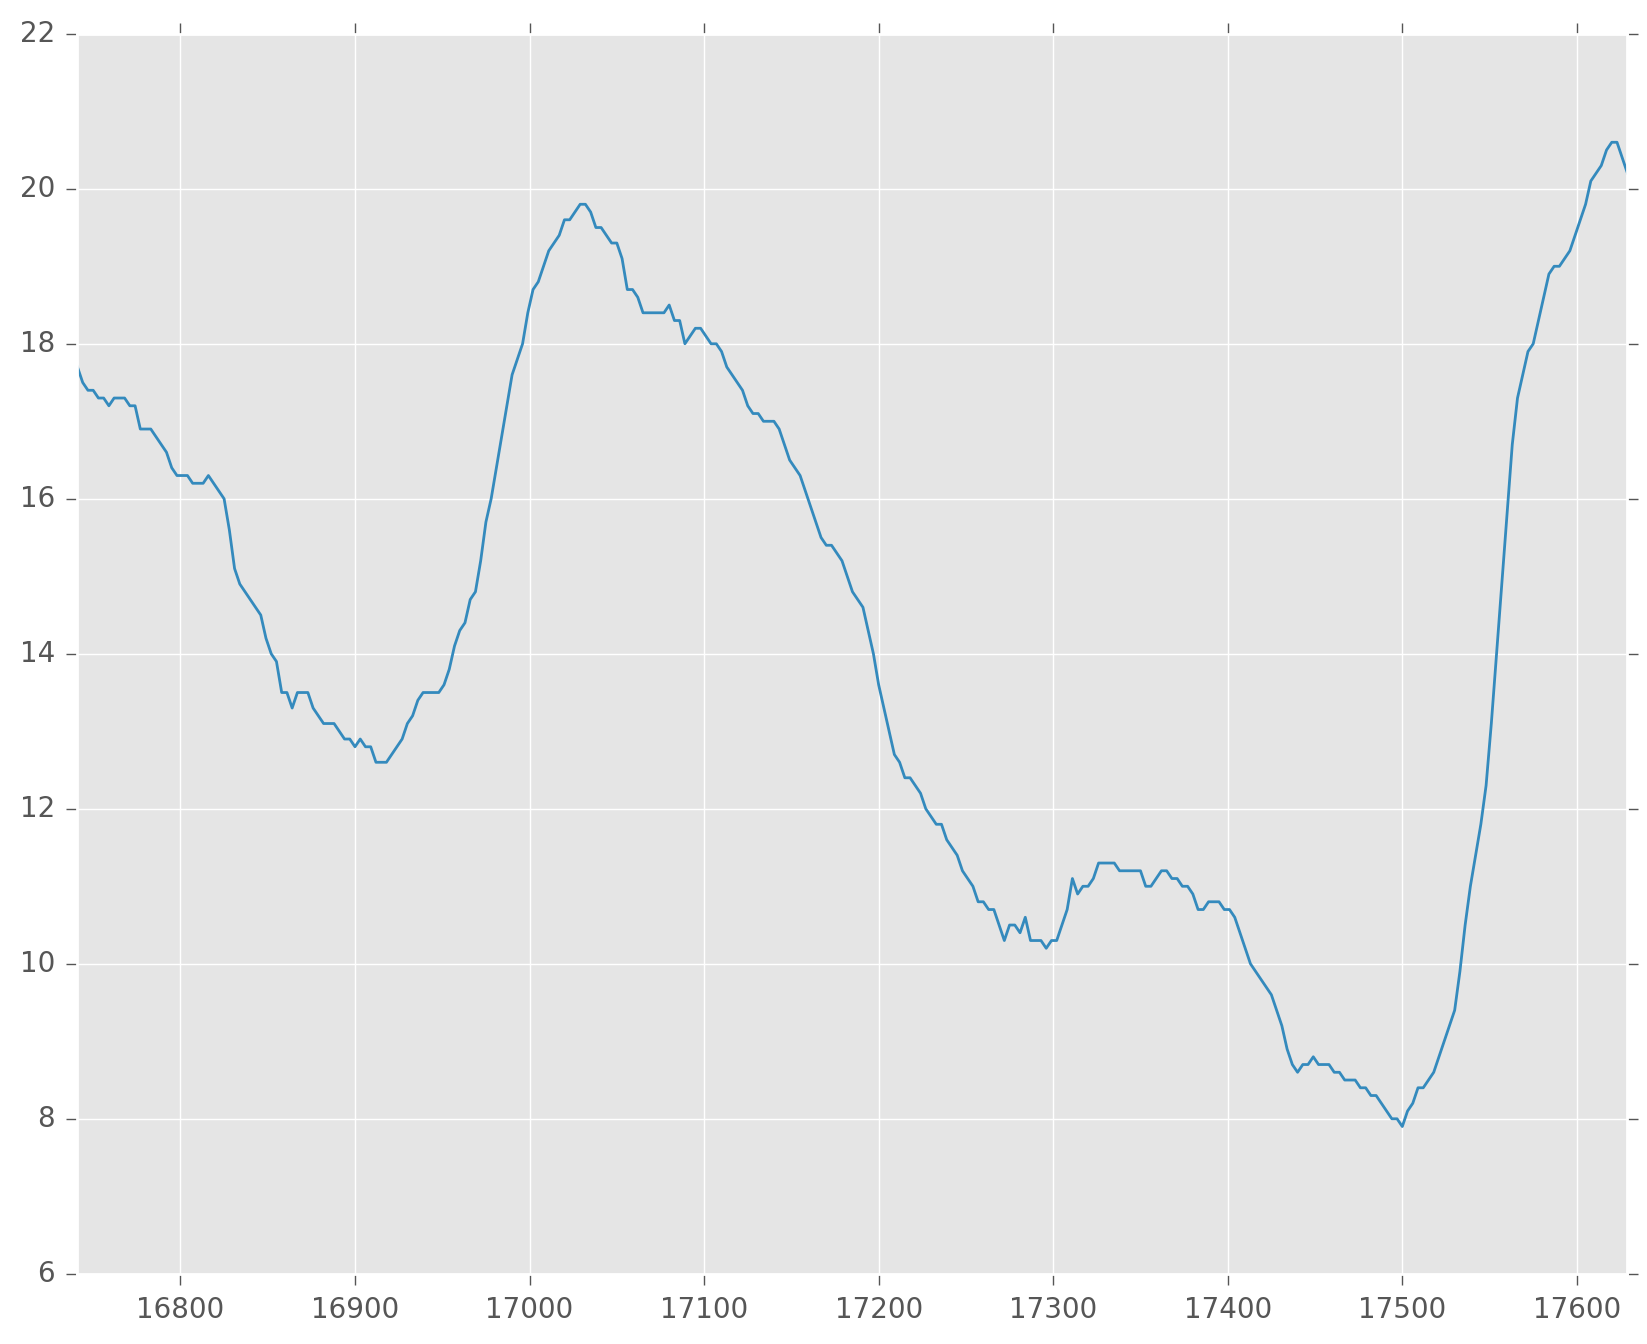

In [52]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='#348ABD')

Note that the values along the x-axis represent the indices associated with Spain in the sorted `unemployment` `DataFrame`. Wouldn't it be nice if, instead, we could show the time period associated with the various unemployment rates for Spain? It might also be interesting to compare Spain's unemployment rate with its neighbor to the west, Portugal.

Let's first create a `DataFrame` that contains the unemployment data for both countries.

In [53]:
ps = unemployment[(unemployment['name_en'].isin(['Portugal', 'Spain'])) &
                  (unemployment['seasonality'] == 'sa')]

Next, we'll add a `datetime` object. `pandas` provides a `to_datetime()` function that makes this relatively simple. It converts an argument&mdash;a single value or an array of values&mdash;to `datetime`. (Note that the return value [depends on the input](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).) If we were interested in March 23, 1868, for example, we could do the following.

In [54]:
pd.to_datetime('1868/3/23')

Timestamp('1868-03-23 00:00:00')

The argument doesn't necessarily have to be specified in the `yyyy/mm/dd` format. You could list it as `mm/dd/yyyy`, but it's a good idea to be explicit. As a result, we pass in a valid string format.

In [55]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')

Timestamp('1868-03-23 00:00:00')

Let's create the `datetime` object and add it to the `DataFrame` as a column named `date`. For this, we'll use the `.insert()` method.

In [56]:
ps.insert(loc=0, column='date',
          value=pd.to_datetime(ps['year'].astype(str) + '/' + ps['month'].astype(str) + '/1'))

Finally, let's only keep certain columns, rename them, and reshape the `DataFrame`.

In [57]:
ps = ps[['date', 'name_en', 'unemployment_rate']]
ps.columns = ['Time Period', 'Country', 'Unemployment Rate']
ps = ps.pivot(index='Time Period', columns='Country', values='Unemployment Rate')
ps.tail()

Country,Portugal,Spain
Time Period,,
2010-08-01,11.1,20.5
2010-09-01,11.1,20.6
2010-10-01,11.0,20.6
2010-11-01,10.9,20.4
2010-12-01,10.9,20.2


Notice the indices.

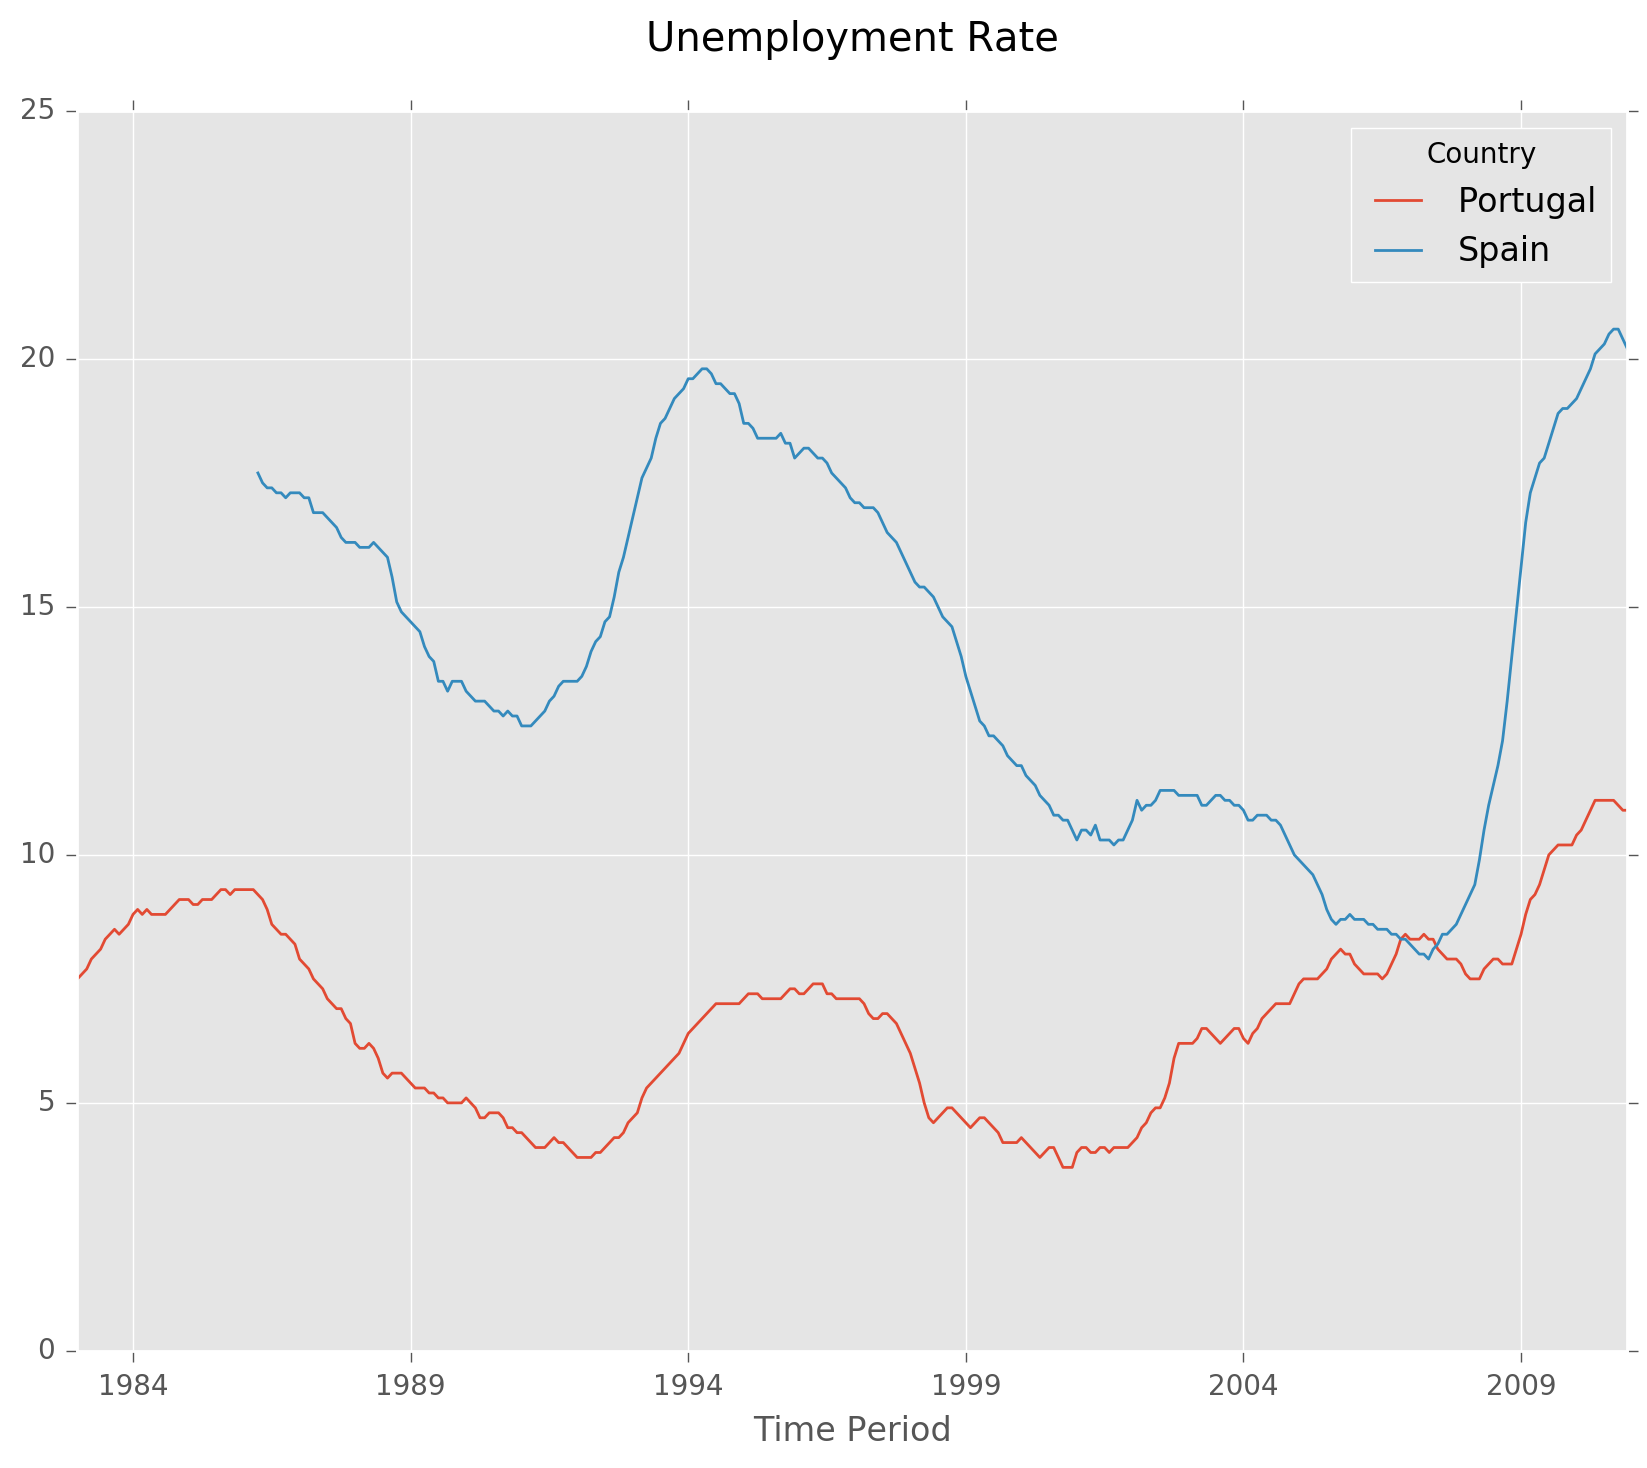

In [58]:
ps.plot(figsize=(10, 8), title='Unemployment Rate\n')